In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_score

from pathlib import Path
import json
import warnings
warnings.filterwarnings('ignore')

import sys
import os
sys.path.append("/zhouxibin/workspaces/mutations")
from utils.rank import rank_strategy_dictionary
from utils.model import model_name_library
from utils.pipeline import read_sequence
from utils.metrics import read_dms_file

In [2]:
color_map = {
    "pretrain_train_full_valid_human": "orange",
    "pretrain_train_full_valid_fullcenter": "darkblue",
    "pretrain_train_center_valid_mouse_35M": "green",
    "pretrain_train_center_valid_mouse_150M": "red",
    "pretrain_train_center_valid_mouse_8M": "purple",
}

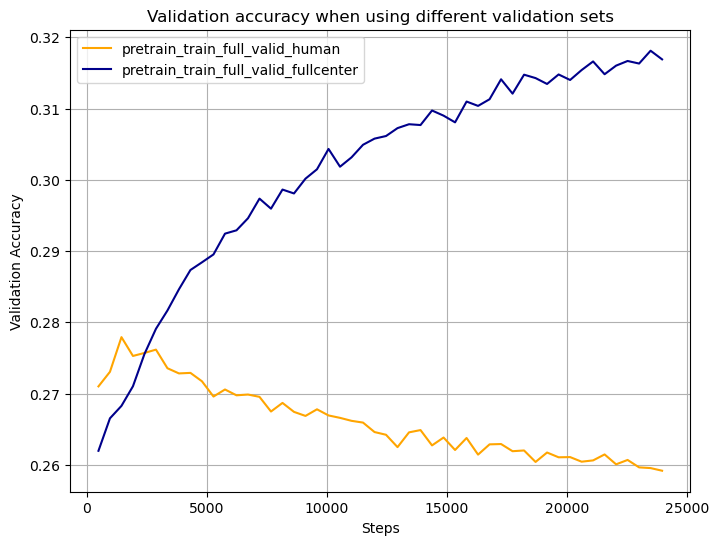

In [3]:
valid_acc_fig1_data = pd.read_csv("./11_data/valid_acc_fig1.csv", index_col=0)
plt.figure(figsize=(8, 6))
valid_acc_fig1_label = ["pretrain_train_full_valid_human", "pretrain_train_full_valid_fullcenter"]
for label in valid_acc_fig1_label:
    plt.plot(
        valid_acc_fig1_data[label],
        label=label,
        color=color_map[label]
    )
plt.grid()
plt.xlabel("Steps")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.title("Validation accuracy when using different validation sets")
plt.savefig("./11_data/valid_acc_fig1.png", dpi=600)
plt.savefig("./11_data/valid_acc_fig1.tiff", dpi=600)
plt.savefig("./11_data/valid_acc_fig1.pdf", dpi=600)

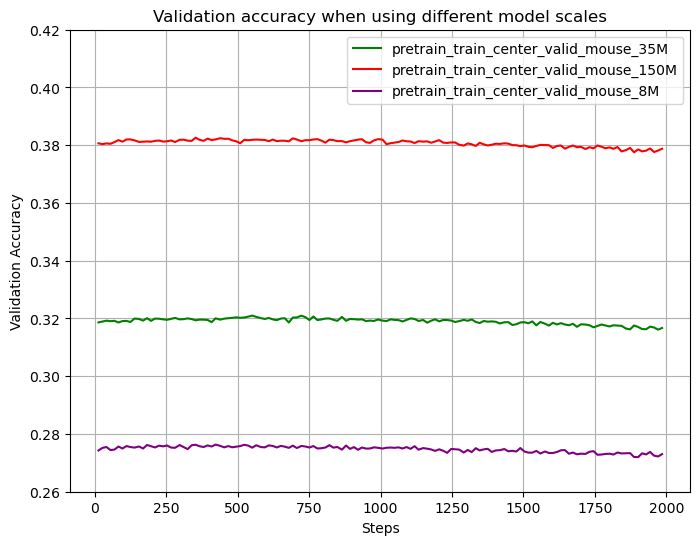

In [22]:
valid_acc_fig2_data = pd.read_csv("./11_data/valid_acc_fig2.csv", index_col=0)
valid_acc_fig2_data = valid_acc_fig2_data[valid_acc_fig2_data.index < 2000]
valid_acc_fig2_label = ["pretrain_train_center_valid_mouse_35M", "pretrain_train_center_valid_mouse_150M", "pretrain_train_center_valid_mouse_8M"]
plt.figure(figsize=(8, 6))
for label in valid_acc_fig2_label:
    plt.plot(
        valid_acc_fig2_data[label],
        label=label,
        color=color_map[label]
    )
plt.grid()
plt.xlabel("Steps")
plt.ylabel("Validation Accuracy")
plt.title("Validation accuracy when using different model scales")
plt.legend()
# plt.legend(bbox_to_anchor=(0.2, ))
plt.ylim(0.26, 0.42)
plt.savefig("./11_data/valid_acc_fig2.png", dpi=600)
plt.savefig("./11_data/valid_acc_fig2.tiff", dpi=600)

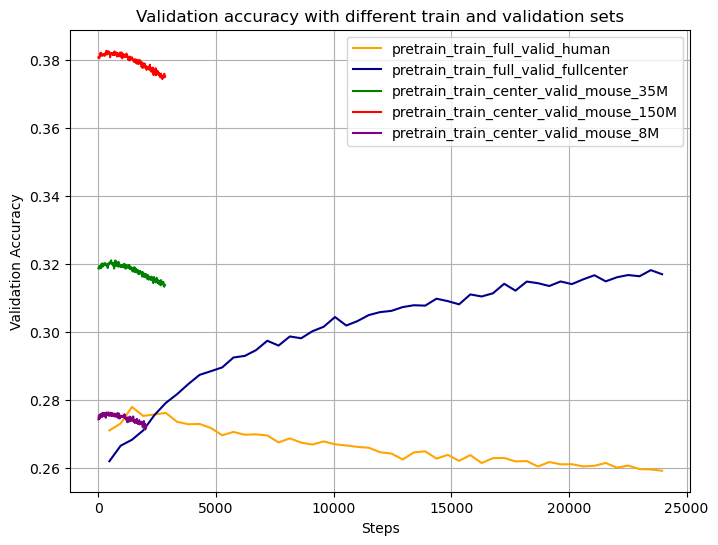

In [23]:
valid_acc_fig3_data = pd.read_csv("./11_data/valid_acc_fig3.csv", index_col=0)
# valid_acc_fig3_data = valid_acc_fig3_data[valid_acc_fig3_data.index < 5000]
plt.figure(figsize=(8, 6))
# print(valid_acc_fig3_data.loc[:, ["pretrain_train_full_valid_human", "pretrain_train_full_valid_fullcenter"]].dropna().head())
for label in valid_acc_fig1_label + valid_acc_fig2_label:
    plt.plot(
        valid_acc_fig3_data[label].dropna(),
        label=label,
        color=color_map[label]
    )
plt.grid()
plt.xlabel("Steps")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.title("Validation accuracy with different train and validation sets")
plt.savefig("./11_data/valid_acc_fig3.png", dpi=600)
plt.savefig("./11_data/valid_acc_fig3.tiff", dpi=600)

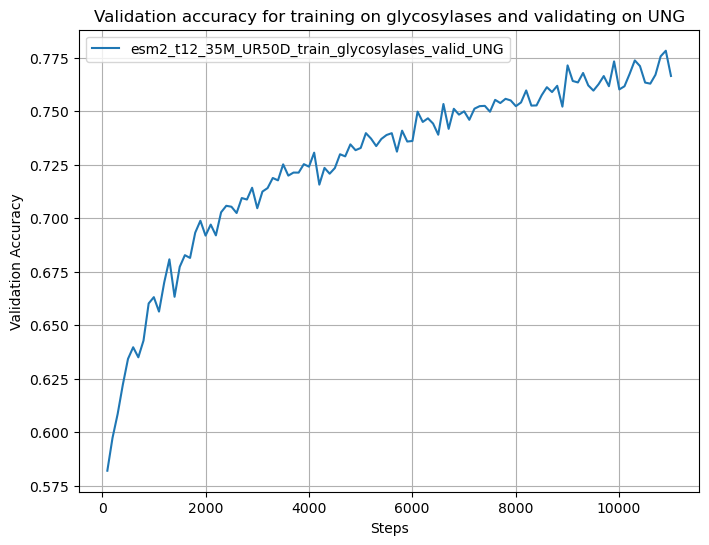

In [24]:
valid_acc_fig4_data = pd.read_csv("./11_data/valid_acc_fig4.csv", index_col=0)
# valid_acc_fig4_data = valid_acc_fig4_data[valid_acc_fig4_data.index < 5000]
plt.figure(figsize=(8, 6))
# print(valid_acc_fig4_data.loc[:, ["pretrain_train_full_valid_human", "pretrain_train_full_valid_fullcenter"]].dropna().head())
plt.plot(
    valid_acc_fig4_data,
    label="esm2_t12_35M_UR50D_train_glycosylases_valid_UNG"
)
# valid_acc_fig4_data.plot()
plt.grid()
plt.xlabel("Steps")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.title("Validation accuracy for training on glycosylases and validating on UNG")
plt.savefig("./11_data/valid_acc_fig4.png", dpi=600)
plt.savefig("./11_data/valid_acc_fig4.tiff", dpi=600)